In [1]:
%pylab inline
from pomegranate import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
asia = DiscreteDistribution( { 'True' : 0.5, 'False' : 0.5 } )

tuberculosis = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.2 ],
     [ 'True', 'False', 0.8 ],
     [ 'False', 'True', 0.01 ],
     [ 'False', 'False', 0.99 ]], [asia])

In [3]:
smoking = DiscreteDistribution( { 'True' : 0.5, 'False' : 0.5 } )

lung = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.75 ],
     [ 'True', 'False', 0.25 ],
     [ 'False', 'True', 0.02 ],
     [ 'False', 'False', 0.98 ]], [smoking] )

bronchitis = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.92 ],
     [ 'True', 'False', 0.08 ],
     [ 'False', 'True', 0.03 ],
     [ 'False', 'False', 0.97 ]], [smoking] )

tuberculosis_or_cancer = ConditionalProbabilityTable(
    [[ 'True', 'True', 'True', 1.0 ],
     [ 'True', 'True', 'False', 0.0 ],
     [ 'True', 'False', 'True', 1.0 ],
     [ 'True', 'False', 'False', 0.0 ],
     [ 'False', 'True', 'True', 1.0 ],
     [ 'False', 'True', 'False', 0.0 ],
     [ 'False', 'False', 'True', 0.0 ],
     [ 'False', 'False', 'False', 1.0 ]], [tuberculosis, lung] )

In [4]:
xray = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.885 ],
     [ 'True', 'False', 0.115 ],
     [ 'False', 'True', 0.04 ],
     [ 'False', 'False', 0.96 ]], [tuberculosis_or_cancer] )

In [5]:
dyspnea = ConditionalProbabilityTable(
    [[ 'True', 'True', 'True', 0.96 ],
     [ 'True', 'True', 'False', 0.04 ],
     [ 'True', 'False', 'True', 0.89 ],
     [ 'True', 'False', 'False', 0.11 ],
     [ 'False', 'True', 'True', 0.96 ],
     [ 'False', 'True', 'False', 0.04 ],
     [ 'False', 'False', 'True', 0.89 ],
     [ 'False', 'False', 'False', 0.11 ]], [tuberculosis_or_cancer, bronchitis])

In [6]:
s0 = State( asia, name="asia" )
s1 = State( tuberculosis, name="tuberculosis" )
s2 = State( smoking, name="smoker" )
s3 = State( lung, name="cancer" )
s4 = State( bronchitis, name="bronchitis" )
s5 = State( tuberculosis_or_cancer, name="TvC" )
s6 = State( xray, name="xray" )
s7 = State( dyspnea, name='dyspnea' )

In [7]:
network = BayesianNetwork( "asia" )
network.add_nodes(s0, s1, s2, s3, s4, s5, s6, s7)

In [8]:
network.add_edge( s0, s1 )
network.add_edge( s1, s5 )
network.add_edge( s2, s3 )
network.add_edge( s2, s4 )
network.add_edge( s3, s5 )
network.add_edge( s5, s6 )
network.add_edge( s5, s7 )
network.add_edge( s4, s7 )

In [9]:

network.bake()

In [10]:
#network.plot()

In [11]:
observations = { 'tuberculosis' : 'True', 'smoker' : 'False', 'bronchitis' : 'True' }

In [12]:
beliefs = map( str, network.predict_proba( observations ) )

In [13]:
print("\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

asia		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.9523809523809521,
            "False" :0.04761904761904782
        }
    ],
    "frozen" :false
}
tuberculosis		True
smoker		False
cancer		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.020000000000000438,
            "False" :0.9799999999999995
        }
    ],
    "frozen" :false
}
bronchitis		True
TvC		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :1.0,
            "False" :0.0
        }
    ],
    "frozen" :false
}
xray		{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "True" :0.8849999999999999,
            "False" :0.11500000000000017
        }
    ],
    "frozen" :false
}
dyspnea

In [32]:
import networkx as nx
import seaborn as sns
import random

In [39]:
network = BayesianNetwork( "asia" )
G = nx.DiGraph()
G.add_node('ASIA', dtype='Discrete', prob=asia, pos=[1, 100])
G.add_node('TUBERCULOSIS', dtype='Discrete', prob=tuberculosis, pos=[1, 80])
G.add_edge('ASIA', 'TUBERCULOSIS')
G.add_node('SMOKER', dtype='Discrete', prob=smoking, pos=[60, 100])
G.add_node('CANCER', dtype='Discrete', prob=lung, pos=[40, 90])
G.add_edge('SMOKER', 'CANCER')
G.add_node('BRONQUITIS', dtype='Discrete', prob=bronchitis, pos=[80, 90])
G.add_edge('SMOKER', 'BRONQUITIS')
G.add_node('TVC', dtype='Discrete', prob=tuberculosis_or_cancer, pos=[20, 60])
G.add_edges_from([('TUBERCULOSIS', 'TVC'), ('CANCER', 'TVC')])
G.add_node('XRAY', dtype='Discrete', prob=xray, pos=[20, 20])
G.add_edge('TVC', 'XRAY')
G.add_node('DYSPNEA', dtype='Discrete', prob=dyspnea, pos=[60, 40])
G.add_edges_from([('BRONQUITIS', 'DYSPNEA'), ('TVC','DYSPNEA')])

In [40]:
pos=nx.get_node_attributes(G,'pos')

In [41]:
pos

{'ASIA': [1, 100],
 'TUBERCULOSIS': [1, 80],
 'SMOKER': [60, 100],
 'CANCER': [40, 90],
 'BRONQUITIS': [80, 90],
 'TVC': [20, 60],
 'XRAY': [20, 20],
 'DYSPNEA': [60, 40]}

C:\Users\Andrea\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Andrea\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Andrea\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Andrea\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Andrea\Anaconda3\lib\site-packages\networkx\drawing

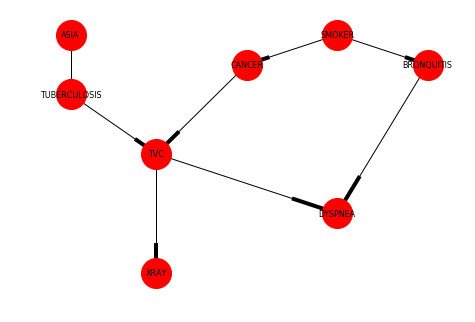

In [42]:
nx.draw(G, pos, with_labels = True, node_size=900, font_size=8, arrows=True)
plt.show()